In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_excel("ITC.NS.xlsx")
print(df)

          Date        Open        High         Low       Close   Adj Close  \
0   2019-08-12  248.750000  253.399994  247.399994  253.000000  206.936203   
1   2019-08-19  253.500000  257.299988  234.649994  236.100006  193.113205   
2   2019-08-26  240.699997  247.649994  234.949997  245.649994  200.924408   
3   2019-09-02  245.649994  246.899994  240.649994  243.899994  199.493011   
4   2019-09-09  244.649994  246.500000  238.600006  239.899994  196.221313   
..         ...         ...         ...         ...         ...         ...   
258 2024-07-22  474.600006  510.649994  465.850006  502.200012  502.200012   
259 2024-07-29  505.500000  506.200012  484.799988  489.100006  489.100006   
260 2024-08-05  480.049988  498.000000  479.549988  495.899994  495.899994   
261 2024-08-12  492.000000  500.000000  488.250000  492.200012  492.200012   
262 2024-08-14  491.950012  499.000000  489.899994  492.549988  492.549988   

     Log return     Volume  
0      0.000000   10337358  
1    

In [3]:
df2 = ['Log return'] #creating a new df to run ADF test.
time_series = df[df2]
print(time_series)

     Log return
0      0.000000
1     -0.069134
2      0.039652
3     -0.007150
4     -0.016536
..          ...
258    0.056632
259   -0.026431
260    0.013807
261   -0.007489
262    0.000711

[263 rows x 1 columns]


### TEST OF STATIONARITY

In [4]:
def adf_test(time_series):
    #perform dickey-fuller test
    print('Result of Dickey Fuller Test: ')
    dftest = adfuller(time_series, autolag ='BIC')
    dfoutput = pd.Series(dftest[0:4],index =['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value(%s)'% key] = value
    print(dfoutput)
    
def plot_time_series(timeseries):
    plt.plot(time_series)
    plt.title('Time Series Data')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

Result of Dickey Fuller Test: 
Test Statistic                -1.792994e+01
p-value                        2.885652e-30
#Lags Used                     0.000000e+00
Number of Observations Used    2.620000e+02
Critical Value(1%)            -3.455558e+00
Critical Value(5%)            -2.872636e+00
Critical Value(10%)           -2.572683e+00
dtype: float64


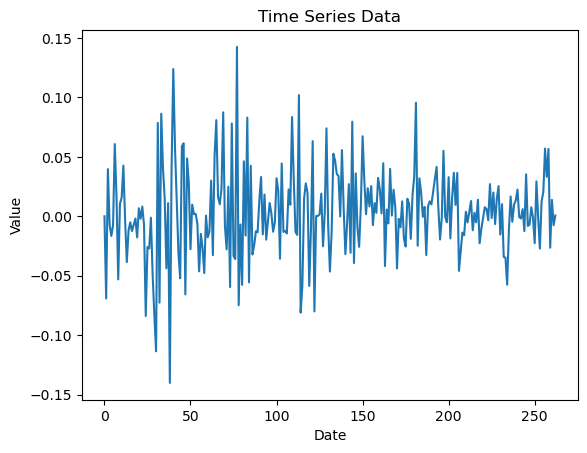

In [5]:
adf_test(time_series)
plot_time_series(time_series)

C:\Users\anike\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


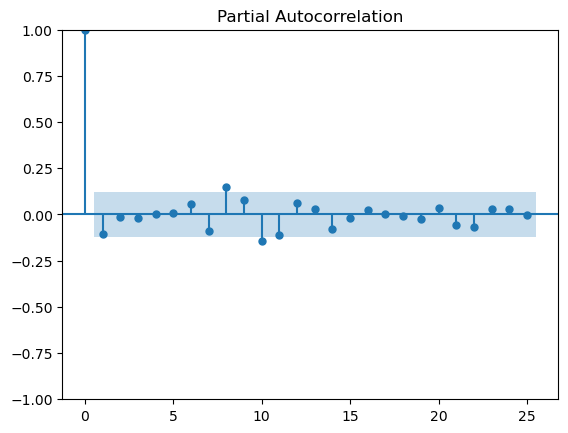

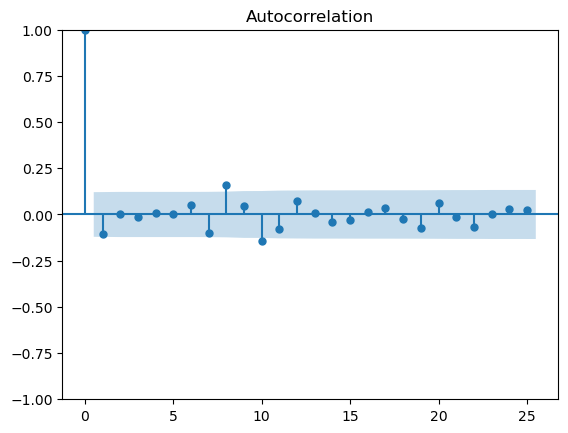

In [6]:
#Checking for autocorrelation & partial autocorrelation
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(time_series['Log return'], lags = 25)
acf = plot_acf(time_series['Log return'], lags = 25)

### CREATING LAG COLUMN IN DATAFRAME OF LAG(1,1)

In [7]:
time_series['lag_1_return'] = time_series['Log return'].shift(1)#Adding lagged values of returns
time_series = time_series.dropna(subset=['lag_1_return'])
print (time_series)

     Log return  lag_1_return
1     -0.069134      0.000000
2      0.039652     -0.069134
3     -0.007150      0.039652
4     -0.016536     -0.007150
5     -0.007742     -0.016536
..          ...           ...
258    0.056632      0.033208
259   -0.026431      0.056632
260    0.013807     -0.026431
261   -0.007489      0.013807
262    0.000711     -0.007489

[262 rows x 2 columns]


C:\Users\anike\AppData\Local\Temp\ipykernel_16520\2677064705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['lag_1_return'] = time_series['Log return'].shift(1)#Adding lagged values of returns


### FITTING AN AUTOREGRESSIVE MODEL

In [8]:
import statsmodels.api as sm

In [9]:
train = time_series[:len(time_series)-79]
test = time_series[len(time_series)-79:]

In [10]:
new_data = time_series.drop(['lag_1_return'], axis=1, inplace= False)

In [11]:
print (new_data)

     Log return
1     -0.069134
2      0.039652
3     -0.007150
4     -0.016536
5     -0.007742
..          ...
258    0.056632
259   -0.026431
260    0.013807
261   -0.007489
262    0.000711

[262 rows x 1 columns]


In [12]:
train = new_data[:len(new_data)-79]
test = new_data[len(new_data)-79:]

In [13]:
model = AutoReg(train,lags=1).fit()

C:\Users\anike\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:             Log return   No. Observations:                  183
Model:                     AutoReg(1)   Log Likelihood                 319.860
Method:               Conditional MLE   S.D. of innovations              0.042
Date:                Sun, 18 Aug 2024   AIC                           -633.721
Time:                        00:14:14   BIC                           -624.109
Sample:                             1   HQIC                          -629.824
                                  183                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0039      0.003      1.249      0.212      -0.002       0.010
Log return.L1    -0.1373      0.073     -1.883      0.060      -0.280       0.006
                                    Root

In [15]:
predict = model.predict(start=len(new_data)-79,end=len(new_data), dynamic = False)
print(predict)

183   -0.000512
184    0.003942
185    0.003331
186    0.003415
187    0.003403
         ...   
258    0.003405
259    0.003405
260    0.003405
261    0.003405
262    0.003405
Length: 80, dtype: float64


C:\Users\anike\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [16]:
subset_df = new_data.iloc[182:262]
print (subset_df)

     Log return
183    0.031934
184    0.020072
185   -0.000390
186    0.007892
187   -0.032614
..          ...
258    0.056632
259   -0.026431
260    0.013807
261   -0.007489
262    0.000711

[80 rows x 1 columns]


In [17]:
result = pd.concat([predict, subset_df], axis=1)

print(result)#Note since predict did not have a column title of its own hence, it took index as title by default.

            0  Log return
183 -0.000512    0.031934
184  0.003942    0.020072
185  0.003331   -0.000390
186  0.003415    0.007892
187  0.003403   -0.032614
..        ...         ...
258  0.003405    0.056632
259  0.003405   -0.026431
260  0.003405    0.013807
261  0.003405   -0.007489
262  0.003405    0.000711

[80 rows x 2 columns]


In [18]:
result = result.dropna() #dropping null values
print(result)

            0  Log return
183 -0.000512    0.031934
184  0.003942    0.020072
185  0.003331   -0.000390
186  0.003415    0.007892
187  0.003403   -0.032614
..        ...         ...
258  0.003405    0.056632
259  0.003405   -0.026431
260  0.003405    0.013807
261  0.003405   -0.007489
262  0.003405    0.000711

[80 rows x 2 columns]


In [19]:
print(type(result)) #checking type of result dataframe

<class 'pandas.core.frame.DataFrame'>


In [20]:
result.rename(columns={0: "Predicted"}, inplace=True) #providing title as "predicted" to 0th column

print(result)

     Predicted  Log return
183  -0.000512    0.031934
184   0.003942    0.020072
185   0.003331   -0.000390
186   0.003415    0.007892
187   0.003403   -0.032614
..         ...         ...
258   0.003405    0.056632
259   0.003405   -0.026431
260   0.003405    0.013807
261   0.003405   -0.007489
262   0.003405    0.000711

[80 rows x 2 columns]


### PLOTTING THE PREDICTED VALUE & ACTUAL VALUE

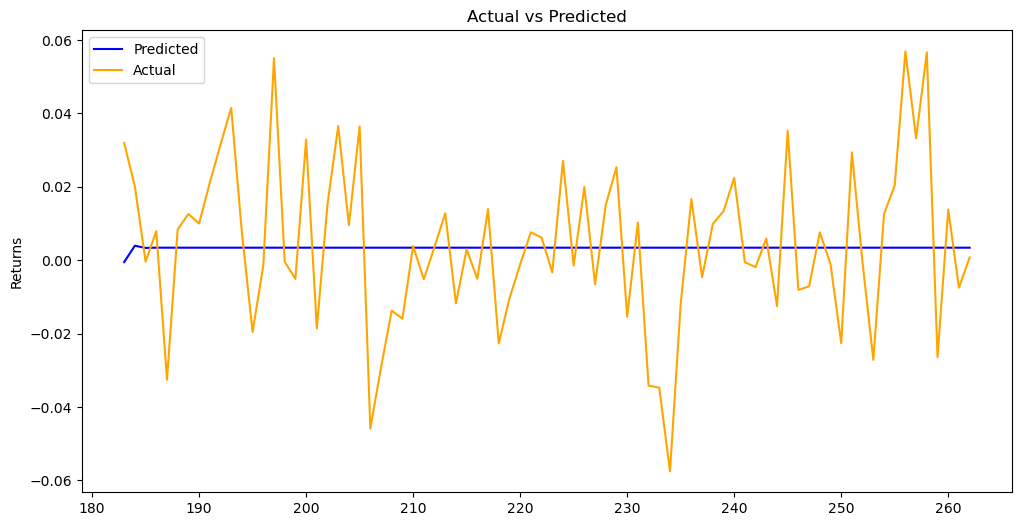

In [21]:
plt.figure(figsize=(12, 6)) 
plt.plot(result["Predicted"], label='Predicted', color='blue')
plt.plot(result['Log return'], label='Actual', color='orange')
plt.title('Actual vs Predicted')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [22]:
result.columns = result.columns.str.replace('0 ', 'Predict')
print(result)

     Predicted  Log return
183  -0.000512    0.031934
184   0.003942    0.020072
185   0.003331   -0.000390
186   0.003415    0.007892
187   0.003403   -0.032614
..         ...         ...
258   0.003405    0.056632
259   0.003405   -0.026431
260   0.003405    0.013807
261   0.003405   -0.007489
262   0.003405    0.000711

[80 rows x 2 columns]


### CALCULATING THE ERRORS/ RESIDUALS

In [23]:
result['Residuals'] = result['Predicted'] - result['Log return']

In [24]:
print(result)

     Predicted  Log return  Residuals
183  -0.000512    0.031934  -0.032446
184   0.003942    0.020072  -0.016130
185   0.003331   -0.000390   0.003720
186   0.003415    0.007892  -0.004477
187   0.003403   -0.032614   0.036017
..         ...         ...        ...
258   0.003405    0.056632  -0.053227
259   0.003405   -0.026431   0.029836
260   0.003405    0.013807  -0.010403
261   0.003405   -0.007489   0.010894
262   0.003405    0.000711   0.002694

[80 rows x 3 columns]


In [25]:
result["Lag_1_return"]=result['Log return'].shift(1) #Generating lag values(1,1) to compare with residuals
print (result)

     Predicted  Log return  Residuals  Lag_1_return
183  -0.000512    0.031934  -0.032446           NaN
184   0.003942    0.020072  -0.016130      0.031934
185   0.003331   -0.000390   0.003720      0.020072
186   0.003415    0.007892  -0.004477     -0.000390
187   0.003403   -0.032614   0.036017      0.007892
..         ...         ...        ...           ...
258   0.003405    0.056632  -0.053227      0.033208
259   0.003405   -0.026431   0.029836      0.056632
260   0.003405    0.013807  -0.010403     -0.026431
261   0.003405   -0.007489   0.010894      0.013807
262   0.003405    0.000711   0.002694     -0.007489

[80 rows x 4 columns]


In [26]:
result = result.dropna() #dropping null values
print(result)

     Predicted  Log return  Residuals  Lag_1_return
184   0.003942    0.020072  -0.016130      0.031934
185   0.003331   -0.000390   0.003720      0.020072
186   0.003415    0.007892  -0.004477     -0.000390
187   0.003403   -0.032614   0.036017      0.007892
188   0.003405    0.008353  -0.004948     -0.032614
..         ...         ...        ...           ...
258   0.003405    0.056632  -0.053227      0.033208
259   0.003405   -0.026431   0.029836      0.056632
260   0.003405    0.013807  -0.010403     -0.026431
261   0.003405   -0.007489   0.010894      0.013807
262   0.003405    0.000711   0.002694     -0.007489

[79 rows x 4 columns]


In [27]:
correlation1_2 = result['Residuals'].corr(result['Lag_1_return']) #checking correlation
print(correlation1_2)

-0.15125092926645006


### PLOTTING CORRELATION BETWEEN RESIDUALS & INDEPENDENT VARIABLE(LAG_1_RETURN)

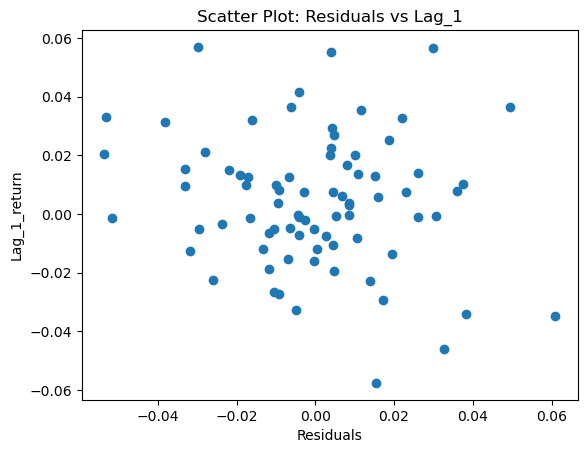

In [28]:
plt.scatter(result['Residuals'], result['Lag_1_return'])
plt.xlabel('Residuals')
plt.ylabel('Lag_1_return')
plt.title('Scatter Plot: Residuals vs Lag_1')
plt.show()